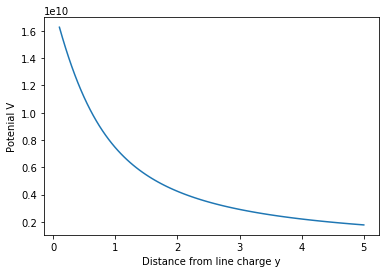

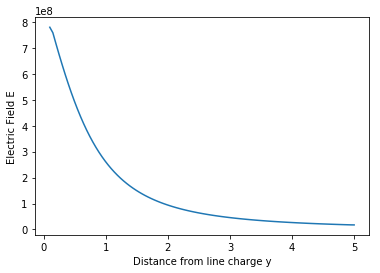

In [4]:
import math as mth
import numpy as np
import scipy.integrate as sci
import scipy.constants as sc
from numpy import array
from myint import *
from myder import *
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

############ Electric Potential and Field 1D, Line Charge ############

V = []
C = 1./(4*pi*sc.epsilon_0)
y = np.linspace(.1,5,100)
f = lambda x: (2*x)*C/np.sqrt(x**2+dy**2)

for dy in y:
    a = sci.romberg(f,0,1)
    V.append(a)

plt.plot(y,V)
plt.xlabel("Distance from line charge y")
plt.ylabel("Potenial V")
plt.show()

E = np.negative(simpleder(V))

plt.plot(y,E)
plt.xlabel("Distance from line charge y")
plt.ylabel("Electric Field E")
plt.show()



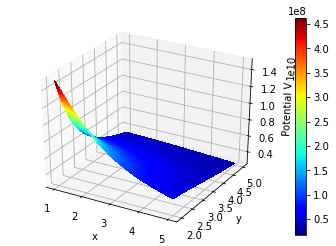

In [2]:
############ Electric Potential and Field 2D, Two Lines of Charge ############

x1=np.linspace(1,5,100)
y1=np.linspace(2,5,100)
v1=np.zeros((len(x1),len(y1)))
v2=np.zeros((len(x1),len(y1)))
V_2D=np.zeros((len(x1),len(y1)))

for i in range(0,len(x1)) :
    for j in range(0,len(y1)) :
        f1=lambda x: (x**2)*C/np.sqrt((x1[i]-x)**2+(y1[j]-1)**2)
        f2=lambda y: y*C/np.sqrt(x1[i]**2+(y1[j]-y)**2)
        v1[i,j]=sci.romberg(f1,0,1)
        v2[i,j]=sci.romberg(f2,1,2)
        V_2D[i,j]=v1[i,j]+v2[i,j]

fig = plt.figure()
ax = fig.gca(projection='3d')
x1, y1 = np.meshgrid(x1, y1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential V')
Gx, Gy = np.gradient(V_2D) # gradients with respect to x and y
G = (Gx**2+Gy**2)**.5  # gradient magnitude
N = G/G.max()  # normalize 0..1
surf = ax.plot_surface(
    x1, y1, V_2D, rstride=1, cstride=1,
    facecolors=cm.jet(N),
    linewidth=0, antialiased=False, shade=False) #surf = ax.plot_surface(x1, y1, V_2D) to plot without gradient
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(G)
plt.colorbar(m)
plt.show()




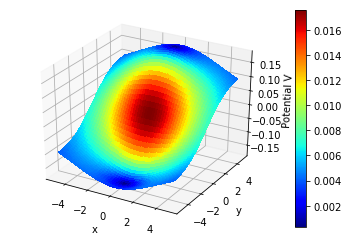

In [35]:
############ Electric Potential and Field 2D, Disk of Charge ############

x2=np.linspace(-5,+5,50)
y2=np.linspace(-5,+5,50)
V_disk=np.zeros((len(x2),len(y2)))

for i in range(0,len(x2)):
    for j in range (0,len(y2)):
        f=lambda r,t : cos(t)*r**2/np.sqrt((x2[i]-r*cos(t))**2 + (y2[j]-r*sin(t))**2 + 5**2 )
        v=sci.nquad(f,[[0,2],[0,2*pi]])
        V_disk[i,j]=v[0]    

fig = plt.figure()
ax = fig.gca(projection='3d')
x2, y2 = np.meshgrid(x2, y2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential V')
Gx, Gy = np.gradient(V_disk) # gradients with respect to x and y
G = (Gx**2+Gy**2)**.5  # gradient magnitude
N = G/G.max()  # normalize 0..1
surf = ax.plot_surface(
    x2, y2, V_disk, rstride=1, cstride=1,
    facecolors=cm.jet(N),
    linewidth=0, antialiased=False, shade=False) #surf = ax.plot_surface(x2, y2, V_disk) to plot without gradient
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(G)
plt.colorbar(m)
plt.show()